# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

#### Data task

Our task is to identify the key features that drive the price of a used car, or in other words, the features in our dataset that are most important in determining the price. To do so, we will need to develop a model or models that selects the features among the numerous features in the dataset that bbest predict the price of a used car. We can examine our best model to derive conclusions about which features have the largest influence on the price.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

- Examine the types of data
- Examine the value counts of data
- Identify non-numeric data as binary/boolean, categorial, ordinal, etc.
- Identify missing data
- Plan steps for correcting and transforming data based on above

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_transformer, make_column_selector
set_config(display="diagram")

import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('data/vehicles.csv')
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [11]:
for c in df.columns:
    print('\n')
    print(df[c].value_counts(dropna = False))
    print(df[c].value_counts().size)
    



id
7222695916    1
7313139418    1
7313423023    1
7313423324    1
7313424533    1
             ..
7314655506    1
7314655833    1
7314657468    1
7314659947    1
7301591129    1
Name: count, Length: 426880, dtype: int64
426880


region
columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
                           ... 
meridian                     28
southwest MS                 14
kansas city                  11
fort smith, AR                9
west virginia (old)           8
Name: count, Length: 404, dtype: int64
404


price
0        32895
6995      3169
7995      3129
9995      2867
8995      2837
         ...  
21298        1
49217        1
63195        1
19709        1
17873        1
Name: count, Length: 15655, dtype: int64
15655


year
2017.0    36420
2018.0    36369
2015.0    31538
2013.0    30794
2016.0    30434
          ...  
1943.0        1
1915.0        1
1902.0     

In [12]:
df.isna().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

(array([4.26869e+05, 0.00000e+00, 4.00000e+00, 2.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 3.00000e+00, 2.00000e+00]),
 array([0.00000000e+00, 3.73692871e+08, 7.47385742e+08, 1.12107861e+09,
        1.49477148e+09, 1.86846436e+09, 2.24215723e+09, 2.61585010e+09,
        2.98954297e+09, 3.36323584e+09, 3.73692871e+09]),
 <BarContainer object of 10 artists>)

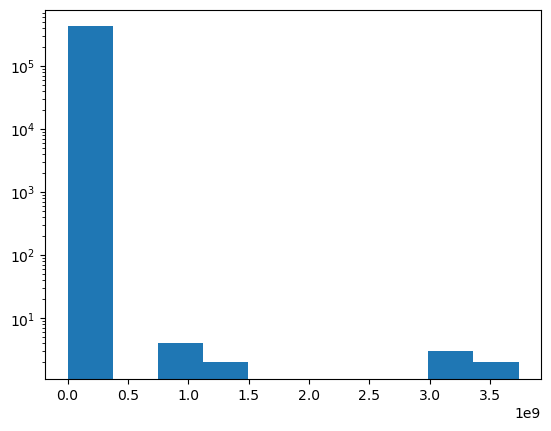

In [13]:
# examine price column more
price_sort = np.sort(df['price'])
plt.hist(price_sort, log=True)

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

#### Begin by removing irrelevant and problematic columns
- id and VIN are irrelevant
- a local used car dealership won't care about region/state
- there are WAY too many different models. this is going to create too many dummy columns when we do one hot encoding and slow things down. several models are represented only once, this isn't going to be super helpful. drop the column for simplicity

In [15]:
drop_columns = ['id', 'VIN', 'region', 'state', 'model']
drop_df = df.drop(columns = drop_columns)

In [16]:
# drop nan values
drop_na_df = drop_df.dropna()
drop_na_df.shape

(80170, 13)

#### Clean data
- drop 'other' values
- remove prices under 1 dollar (there are tons) and over a million to keep data in a reasonable range
- manufacturer harley-davidson and type bus don't belong in an analysis focused on cars

In [17]:
# drop 'other' values and 0-1 for price
# drop harley-davidson and bus
mask = (drop_na_df['fuel'] != 'other') & (drop_na_df['cylinders'] != 'other') & \
(drop_na_df['type'] != 'other') & (drop_na_df['transmission'] != 'other') & \
(drop_na_df['price'] > 1) & (drop_na_df['price'] <= 1000000) & \
(drop_na_df['manufacturer'] != 'harley-davidson') & (drop_na_df['type'] != 'bus')
clean_df = drop_na_df[mask]
clean_df.shape

(74464, 13)

In [18]:
clean_df.reset_index(drop=True, inplace=True)
clean_df.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
0,15000,2013.0,ford,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black
1,19900,2004.0,ford,good,8 cylinders,diesel,88000.0,clean,automatic,4wd,full-size,pickup,blue
2,14000,2012.0,honda,excellent,6 cylinders,gas,95000.0,clean,automatic,fwd,full-size,mini-van,silver
3,22500,2001.0,ford,good,8 cylinders,diesel,144700.0,clean,manual,rwd,full-size,truck,white
4,15000,2017.0,dodge,excellent,8 cylinders,gas,90000.0,rebuilt,automatic,rwd,mid-size,sedan,grey


In [19]:
X = clean_df.drop(columns = ['price'])
y = clean_df['price']

In [20]:
# create train / test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

Thoughts:
- One hot encoding is going to wind up making a ton of columns - try to keep things simple so we can actual process all this data
- We don't have many numeric values, mostly just boolean dummies, so I don't think polynomials are necessary
- Forward and backward feature selection will be used to find the most relevant features
- I want to use Lasso and Ridge regression as well, but I really don't know how so many one-hot/ordinal features are going to affect the algorithms. Do these features get standardization? I will skip this for simplicity and focus on SFS/BFS

Models to build:
- Basic linear regression
- Forward feature selection
- Backward feature selection


In [21]:
# build transformer
# making an assumption about the ordering of the condition columns
ordinal_condition = ['salvage', 'fair', 'good', 'excellent', 'like new', 'new']
one_hot_columns = ['manufacturer', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', \
                   'size', 'type', 'paint_color']


ordinal_ohe = make_column_transformer((OrdinalEncoder(categories = [ordinal_condition]), ['condition']),
                                    (OneHotEncoder(drop = 'if_binary', sparse_output = False), one_hot_columns),
                                     remainder = 'passthrough')

In [22]:
# Linear regression
lin_pipe = Pipeline([('transformer', ordinal_ohe),
                ('linreg', LinearRegression())])
lin_pipe.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['salvage',
                                                                              'fair',
                                                                              'good',
                                                                              'excellent',
                                                                              'like '
                                                                              'new',
                                                                              'new']]),
                                                  ['condition']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse_output=False),
                                                  ['manufacturer', 'cylinders',
                                                   'fuel', 'title_status',
                                                   'transmission', 'drive',
                                                   'size', 'type',
                                                   'paint_color'])])),
                ('linreg', LinearRegression())])

In [23]:
train_mse = mean_squared_error(y_train, lin_pipe.predict(X_train))
test_mse = mean_squared_error(y_test, lin_pipe.predict(X_test))

print(f'Train mse: {train_mse}')
print(f'Test mse: {test_mse}')

Train mse: 87997697.15582116
Test mse: 82768151.36566238


In [24]:
mse_df = pd.DataFrame({'model' : 'linear regression', 'train mse' : train_mse, 'test mse' : test_mse}, index = [0])

In [25]:
# examining coefficients will give us a sense of most important features,
# even if the coefficients aren't equally scaled

coefs = lin_pipe.named_steps['linreg'].coef_
feature_names = lin_pipe.named_steps['transformer'].get_feature_names_out()
linreg_feat_df = pd.DataFrame({'feature': feature_names, 'coef': coefs})

linreg_feat_df['abs coef'] = np.abs(linreg_feat_df['coef'])
linreg_feat_df['impact'] = ''
linreg_feat_df.loc[linreg_feat_df['coef'] < 0, 'impact'] = 'Negative'
linreg_feat_df.loc[linreg_feat_df['coef'] > 0, 'impact'] = 'Positive'

linreg_feat_df['feature'] = \
linreg_feat_df['feature'].str.replace('onehotencoder__', '').str.replace('ordinal__', '')\
.str.replace('ordinalencoder__', '').str.replace('remainder__', '')

linreg_feat_df.sort_values('abs coef', ascending = False)[:20]

,feature,coef,abs coef,impact
12,manufacturer_ferrari,86397.813932,86397.813932,Positive
37,manufacturer_tesla,54102.299619,54102.299619,Positive
3,manufacturer_aston-martin,24420.638048,24420.638048,Positive
32,manufacturer_porsche,10112.419799,10112.419799,Positive
13,manufacturer_fiat,-8798.485802,8798.485802,Negative
35,manufacturer_saturn,-8420.989965,8420.989965,Negative
27,manufacturer_mercury,-7763.455750,7763.455750,Negative
9,manufacturer_chrysler,-7430.628043,7430.628043,Negative
28,manufacturer_mini,-7061.402457,7061.402457,Negative
36,manufacturer_subaru,-7045.823191,7045.823191,Negative


In [26]:
# SFS
sequential_pipe = Pipeline([('transformer', ordinal_ohe),
                            ('selector', SequentialFeatureSelector(LinearRegression(),
                                                                   n_features_to_select = 20,
                                                                  scoring = 'neg_mean_squared_error')),
                           ('linreg', LinearRegression())])
sequential_pipe.fit(X_train, y_train)


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['salvage',
                                                                              'fair',
                                                                              'good',
                                                                              'excellent',
                                                                              'like '
                                                                              'new',
                                                                              'new']]),
                                                  ['condition']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse_output=False),
                                                  ['manufacturer', 'cylinders',
                                                   'fuel', 'title_status',
                                                   'transmission', 'drive',
                                                   'size', 'type',
                                                   'paint_color'])])),
                ('selector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=20,
                                           scoring='neg_mean_squared_error')),
                ('linreg', LinearRegression())])

In [27]:
sequential_train_mse = mean_squared_error(y_train, sequential_pipe.predict(X_train))
sequential_test_mse = mean_squared_error(y_test, sequential_pipe.predict(X_test))
print(f'SFS train mse: {sequential_train_mse}')
print(f'SFS test mse: {sequential_test_mse}')

SFS train mse: 90075571.29713102
SFS test mse: 84797487.46300444


In [28]:
mse_df.loc[len(mse_df)] = ({'model' : 'SFS', 'train mse' : sequential_train_mse, 'test mse' : sequential_test_mse})

In [29]:
# extract features selected
features_out = sequential_pipe.named_steps['transformer'].get_feature_names_out()
feature_used = sequential_pipe.named_steps['selector'].get_support()
sfs_feat_df = pd.DataFrame({'feature' : features_out, 'used' : feature_used})
sfs_feat_df = sfs_feat_df[sfs_feat_df['used'] == True][['feature']]

In [30]:
# view coefs of features - I'm assuming they are in the correct order
sfs_feat_df['coef'] = sequential_pipe.named_steps['linreg'].coef_
sfs_feat_df['abs coef'] = np.abs(sfs_feat_df['coef'])
sfs_feat_df['impact'] = ''
sfs_feat_df.loc[sfs_feat_df['coef'] < 0, 'impact'] = 'Negative'
sfs_feat_df.loc[sfs_feat_df['coef'] > 0, 'impact'] = 'Positive'

sfs_feat_df['feature'] = \
sfs_feat_df['feature'].str.replace('onehotencoder__', '').str.replace('ordinal__', '')\
.str.replace('ordinalencoder__', '').str.replace('remainder__', '')

sfs_feat_df.sort_values('abs coef', ascending = False)

,feature,coef,abs coef,impact
12,manufacturer_ferrari,91672.047862,91672.047862,Positive
32,manufacturer_porsche,15263.248385,15263.248385,Positive
48,fuel_diesel,11181.486826,11181.486826,Positive
41,cylinders_10 cylinders,10006.434182,10006.434182,Positive
74,type_truck,5693.648406,5693.648406,Positive
68,type_coupe,5459.441088,5459.441088,Positive
67,type_convertible,5277.396744,5277.396744,Positive
47,cylinders_8 cylinders,5078.522505,5078.522505,Positive
75,type_van,4141.864323,4141.864323,Positive
0,condition,3919.471868,3919.471868,Positive


In [31]:
# Backward Feature Selection
backward_pipe = Pipeline([('transformer', ordinal_ohe),
                            ('selector', SequentialFeatureSelector(LinearRegression(),
                                                                   scoring = 'neg_mean_squared_error',
                                                                   n_features_to_select = 20,
                                                                   direction = 'backward')),
                           ('linreg', LinearRegression())])
backward_pipe.fit(X_train, y_train)



Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['salvage',
                                                                              'fair',
                                                                              'good',
                                                                              'excellent',
                                                                              'like '
                                                                              'new',
                                                                              'new']]),
                                                  ['condition']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse_output=False),
                                                  ['manufacturer', 'cylinders',
                                                   'fuel', 'title_status',
                                                   'transmission', 'drive',
                                                   'size', 'type',
                                                   'paint_color'])])),
                ('selector',
                 SequentialFeatureSelector(direction='backward',
                                           estimator=LinearRegression(),
                                           n_features_to_select=20,
                                           scoring='neg_mean_squared_error')),
                ('linreg', LinearRegression())])

In [32]:
backward_train_mse = mean_squared_error(y_train, backward_pipe.predict(X_train))
backward_test_mse = mean_squared_error(y_test, backward_pipe.predict(X_test))
print(f'BFS train mse: {backward_train_mse}')
print(f'BFS test mse: {backward_test_mse}')

BFS train mse: 90943806.4386659
BFS test mse: 84980301.54048277


In [33]:
mse_df.loc[len(mse_df)] = ({'model' : 'BFS', 'train mse' : backward_train_mse, 'test mse' : backward_test_mse})

In [34]:
# extract features selected
features_out = backward_pipe.named_steps['transformer'].get_feature_names_out()
feature_used = backward_pipe.named_steps['selector'].get_support()
bfs_feat_df = pd.DataFrame({'feature' : features_out, 'used' : feature_used})
bfs_feat_df = bfs_feat_df[bfs_feat_df['used'] == True][['feature']]

In [35]:
# view coefs of features
bfs_feat_df['coef'] = backward_pipe.named_steps['linreg'].coef_
bfs_feat_df['abs coef'] = np.abs(bfs_feat_df['coef'])
bfs_feat_df['impact'] = ''
bfs_feat_df.loc[bfs_feat_df['coef'] < 0, 'impact'] = 'Negative'
bfs_feat_df.loc[bfs_feat_df['coef'] > 0, 'impact'] = 'Positive'

bfs_feat_df['feature'] = \
bfs_feat_df['feature'].str.replace('onehotencoder__', '').str.replace('ordinal__', '')\
.str.replace('ordinalencoder__', '').str.replace('remainder__', '')

bfs_feat_df.sort_values('abs coef', ascending = False)

,feature,coef,abs coef,impact
12,manufacturer_ferrari,90792.516338,90792.516338,Positive
48,fuel_diesel,10890.349787,10890.349787,Positive
41,cylinders_10 cylinders,7936.147662,7936.147662,Positive
67,type_convertible,6192.626587,6192.626587,Positive
68,type_coupe,5882.976884,5882.976884,Positive
74,type_truck,5677.718579,5677.718579,Positive
75,type_van,4166.217410,4166.217410,Positive
0,condition,3927.233032,3927.233032,Positive
60,drive_fwd,-3874.567016,3874.567016,Negative
47,cylinders_8 cylinders,3088.429472,3088.429472,Positive


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

#### Although we now have models that should select the most important features, I think it is actually more important that we are able to rank and compare all the features, as I think this might be more useful to a car dealer when selecting inventory. They may not be able to find the exact features they need, but rather be in a position of comparing between the options available.
#### I want to explore Ridge and Lasso as models that are better suited for utilizing all features, so I'm going to do sort of a naive approach since I'm still not sure how the one-hot/ordinal encoding will affect the results

In [36]:
# apply standardization to numeric types, use the same ordinal/onehot encoding as before
scaled_ordinal_ohe = make_column_transformer((StandardScaler(), make_column_selector(dtype_include=np.number)),
                                    (OrdinalEncoder(categories = [ordinal_condition]), ['condition']),
                                    (OneHotEncoder(drop = 'if_binary', sparse_output = False), one_hot_columns),
                                     remainder = 'passthrough')

In [37]:
# Ridge 
ridge_param_dict = {'ridge__alpha': [.001, .01, .1, 1, 10, 100, 1000]}
ridge_pipe = Pipeline([('transformer', scaled_ordinal_ohe), 
                      ('ridge', Ridge(random_state = 42))])

In [38]:
# Grid search for best alpha
ridge_grid = GridSearchCV(ridge_pipe, param_grid=ridge_param_dict)
ridge_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x1415cc8d0>),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['salvage',
                                                                                                     'fair',
                                                                                                     'good',
                                                                                                     'excellent',
                                                                                                     'like '
                                                                                                     'new',
                                                                                                     'new']]),
                                                                         ['condition']),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(drop='if_binary',
                                                                                       sparse_output=False),
                                                                         ['manufacturer',
                                                                          'cylinders',
                                                                          'fuel',
                                                                          'title_status',
                                                                          'transmission',
                                                                          'drive',
                                                                          'size',
                                                                          'type',
                                                                          'paint_color'])])),
                                       ('ridge', Ridge(random_state=42))]),
             param_grid={'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [39]:
# test best model
best_ridge = ridge_grid.best_estimator_
best_ridge

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x13f561fd0>),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['salvage',
                                                                              'fair',
                                                                              'good',
                                                                              'excellent',
                                                                              'like '
                                                                              'new',
                                                                              'new']]),
                                                  ['condition']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse_output=False),
                                                  ['manufacturer', 'cylinders',
                                                   'fuel', 'title_status',
                                                   'transmission', 'drive',
                                                   'size', 'type',
                                                   'paint_color'])])),
                ('ridge', Ridge(alpha=0.001, random_state=42))])

In [40]:
ridge_train_preds = best_ridge.predict(X_train)
ridge_test_preds = best_ridge.predict(X_test)
ridge_train_mse = mean_squared_error(y_train, ridge_train_preds)
ridge_test_mse = mean_squared_error(y_test, ridge_test_preds)

print(f'Ridge train mse: {ridge_train_mse}')
print(f'Ridge test mse: {ridge_test_mse}')

Ridge train mse: 87997697.24124777
Ridge test mse: 82768034.40619433


In [41]:
mse_df.loc[len(mse_df)] = ({'model' : 'Ridge', 'train mse' : ridge_train_mse, 'test mse' : ridge_test_mse})

In [42]:
# view coefs
ridge_feat_df = pd.DataFrame({'feature' : best_ridge.named_steps['transformer'].get_feature_names_out(),
                             'coef' : best_ridge.named_steps['ridge'].coef_})

ridge_feat_df['abs coef'] = np.abs(ridge_feat_df['coef'])
ridge_feat_df['impact'] = ''
ridge_feat_df.loc[ridge_feat_df['coef'] < 0, 'impact'] = 'Negative'
ridge_feat_df.loc[ridge_feat_df['coef'] > 0, 'impact'] = 'Positive'

ridge_feat_df['feature'] = \
ridge_feat_df['feature'].str.replace('onehotencoder__', '').str.replace('ordinal__', '')\
.str.replace('ordinalencoder__', '').str.replace('standardscaler__', '')

ridge_feat_df.sort_values('abs coef', ascending = False)[:20]

,feature,coef,abs coef,impact
14,manufacturer_ferrari,86385.293836,86385.293836,Positive
39,manufacturer_tesla,54047.782800,54047.782800,Positive
5,manufacturer_aston-martin,24416.384040,24416.384040,Positive
34,manufacturer_porsche,10114.276428,10114.276428,Positive
15,manufacturer_fiat,-8796.448986,8796.448986,Negative
37,manufacturer_saturn,-8419.012055,8419.012055,Negative
29,manufacturer_mercury,-7761.496682,7761.496682,Negative
11,manufacturer_chrysler,-7428.689172,7428.689172,Negative
30,manufacturer_mini,-7059.439826,7059.439826,Negative
38,manufacturer_subaru,-7043.883233,7043.883233,Negative


In [43]:
# Lasso
lasso_pipe = Pipeline([('transformer', scaled_ordinal_ohe),
                     ('lasso', Lasso(random_state = 42))])

lasso_pipe.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x1415cc8d0>),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['salvage',
                                                                              'fair',
                                                                              'good',
                                                                              'excellent',
                                                                              'like '
                                                                              'new',
                                                                              'new']]),
                                                  ['condition']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse_output=False),
                                                  ['manufacturer', 'cylinders',
                                                   'fuel', 'title_status',
                                                   'transmission', 'drive',
                                                   'size', 'type',
                                                   'paint_color'])])),
                ('lasso', Lasso(random_state=42))])

In [44]:
lasso_train_mse = mean_squared_error(y_train, lasso_pipe.predict(X_train))
lasso_test_mse = mean_squared_error(y_test, lasso_pipe.predict(X_test))

print(f'Lasso train mse: {lasso_train_mse}')
print(f'Lasso test mse: {lasso_test_mse}')

Lasso train mse: 88089730.5747866
Lasso test mse: 82711679.48584096


In [45]:
mse_df.loc[len(mse_df)] = ({'model' : 'Lasso', 'train mse' : lasso_train_mse, 'test mse' : lasso_test_mse})

In [46]:
# coefs
lasso_pipe.named_steps['transformer'].get_feature_names_out()
lasso_pipe.named_steps['lasso'].coef_

lasso_features_out = lasso_pipe.named_steps['transformer'].get_feature_names_out()
lasso_coefs = lasso_pipe.named_steps['lasso'].coef_
lasso_feat_df = pd.DataFrame({'feature' : lasso_features_out, 'coef' : lasso_coefs})
lasso_feat_df['abs coef'] = np.abs(lasso_feat_df['coef'])
lasso_feat_df['impact'] = ''
lasso_feat_df.loc[lasso_feat_df['coef'] < 0, 'impact'] = 'Negative'
lasso_feat_df.loc[lasso_feat_df['coef'] > 0, 'impact'] = 'Positive'

lasso_feat_df['feature'] = \
lasso_feat_df['feature'].str.replace('onehotencoder__', '').str.replace('ordinal__', '')\
.str.replace('ordinalencoder__', '').str.replace('standardscaler__', '')

lasso_feat_df.sort_values('abs coef', ascending = False)[:20]

,feature,coef,abs coef,impact
14,manufacturer_ferrari,82770.322583,82770.322583,Positive
5,manufacturer_aston-martin,16754.365535,16754.365535,Positive
34,manufacturer_porsche,14864.109635,14864.109635,Positive
50,fuel_diesel,10763.329695,10763.329695,Positive
51,fuel_electric,8837.214271,8837.214271,Positive
43,cylinders_10 cylinders,7624.243091,7624.243091,Positive
39,manufacturer_tesla,7024.411943,7024.411943,Positive
4,manufacturer_alfa-romeo,5664.141430,5664.141430,Positive
36,manufacturer_rover,4552.681709,4552.681709,Positive
55,title_status_lien,4127.131773,4127.131773,Positive


### Analysis

In [47]:
# so we can view full dataframes
pd.set_option('display.max_rows', 100)

In [48]:
# compare mse
print(mse_df.sort_values('test mse'))

               model     train mse      test mse
4              Lasso  8.808973e+07  8.271168e+07
3              Ridge  8.799770e+07  8.276803e+07
0  linear regression  8.799770e+07  8.276815e+07
1                SFS  9.007557e+07  8.479749e+07
2                BFS  9.094381e+07  8.498030e+07


#### Somewhat surprisingly, basic linear regression is our best performing model. Let's look at the features in this model in terms of positive and negative impact on price.

In [49]:
linreg_negative = linreg_feat_df[linreg_feat_df['coef'] <= 0].sort_values('coef', ascending = True)
linreg_negative[['feature', 'coef']].set_index('feature')

,coef
feature,
manufacturer_fiat,-8798.485802
manufacturer_saturn,-8420.989965
manufacturer_mercury,-7763.455750
manufacturer_chrysler,-7430.628043
manufacturer_mini,-7061.402457
manufacturer_subaru,-7045.823191
manufacturer_nissan,-6893.308456
manufacturer_kia,-6749.149773
manufacturer_mazda,-6294.993077


In [50]:
linreg_positive = linreg_feat_df[linreg_feat_df['coef'] >= 0].sort_values('coef', ascending = False)
linreg_positive[['feature', 'coef']].set_index('feature')

,coef
feature,
manufacturer_ferrari,86397.813932
manufacturer_tesla,54102.299619
manufacturer_aston-martin,24420.638048
manufacturer_porsche,10112.419799
cylinders_10 cylinders,6658.190522
manufacturer_datsun,6126.182846
fuel_diesel,5950.717138
fuel_electric,3990.895074
paint_color_orange,3917.805938


#### The other two models that use all features - Ridge and Lasso - performed comparably to baseline linear regression. Let's aggregate and average the features for these top 3 models and again examine the impact of the features on price

In [51]:
# prepare to merge our 3 dataframes on the coef column
linreg_feat_df['linreg coef'] = linreg_feat_df['coef']
ridge_feat_df['ridge coef'] = ridge_feat_df['coef']
lasso_feat_df['lasso coef'] = lasso_feat_df['coef']

In [52]:
# do merge
linreg_coef = linreg_feat_df.set_index('feature')[['linreg coef']]
ridge_coef = ridge_feat_df.set_index('feature')[['ridge coef']]
lasso_coef = lasso_feat_df.set_index('feature')[['lasso coef']]
merge_coef_df = linreg_coef.join(ridge_coef, how = 'outer').join(lasso_coef, how = 'outer')
merge_coef_df.head()

,linreg coef,ridge coef,lasso coef
feature,,,
condition,3843.154373,3843.154348,3844.355301
cylinders_10 cylinders,6658.190522,6658.142830,7624.243091
cylinders_12 cylinders,321.459406,321.622783,140.851602
cylinders_3 cylinders,-1290.624256,-1290.637784,-0.000000
cylinders_4 cylinders,-2170.963156,-2170.990541,-1044.772569


In [53]:
# calculate average of coefficients
merge_coef_df['avg coef'] = merge_coef_df[['linreg coef', 'ridge coef', 'lasso coef']].mean(axis = 1)
merge_coef_df.head()

,linreg coef,ridge coef,lasso coef,avg coef
feature,,,,
condition,3843.154373,3843.154348,3844.355301,3843.554674
cylinders_10 cylinders,6658.190522,6658.142830,7624.243091,6980.192148
cylinders_12 cylinders,321.459406,321.622783,140.851602,261.311264
cylinders_3 cylinders,-1290.624256,-1290.637784,-0.000000,-860.420680
cylinders_4 cylinders,-2170.963156,-2170.990541,-1044.772569,-1795.575422


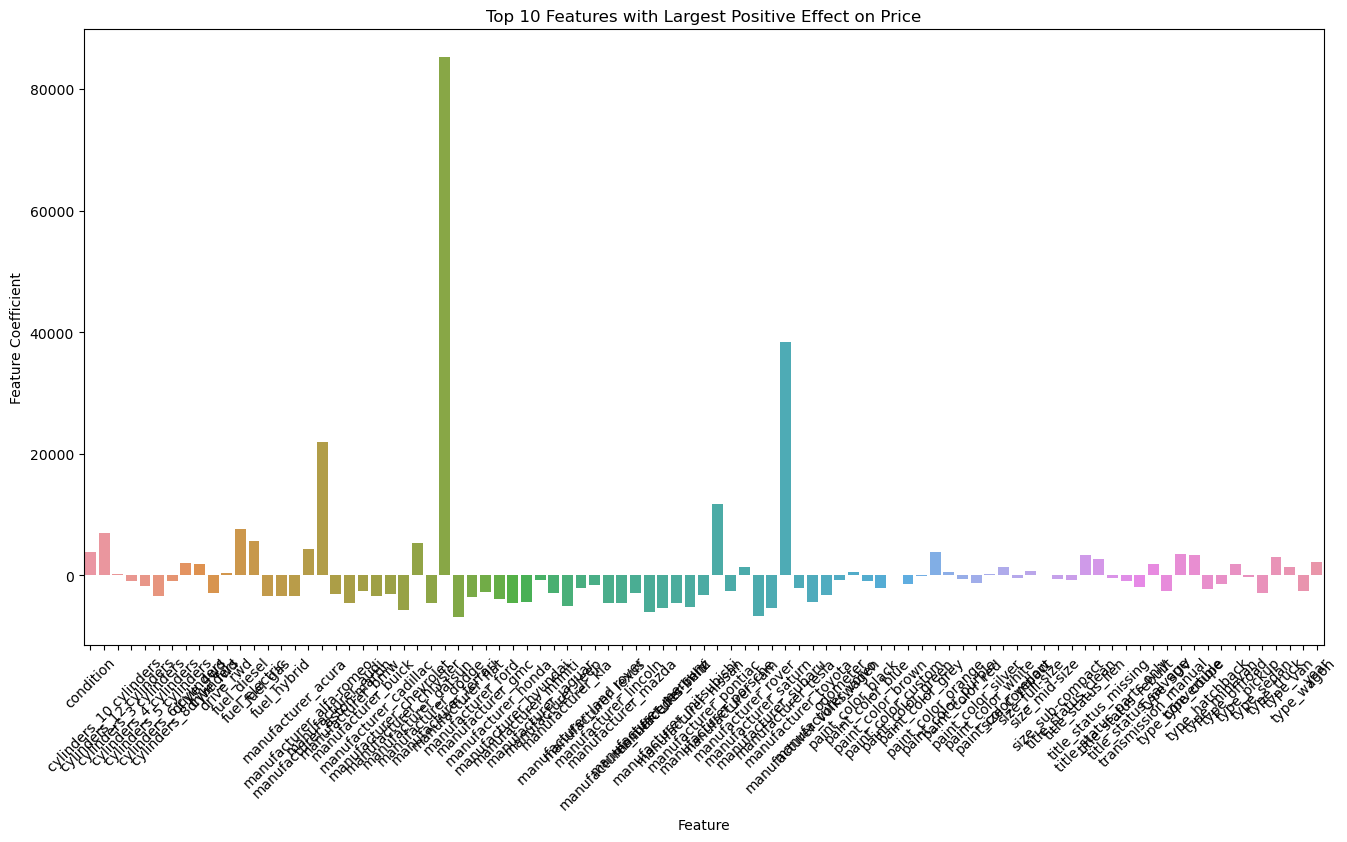

In [58]:
plt.figure(figsize = [16, 8])
plt.xticks(rotation=45)
plt.title("Top 10 Features with Largest Positive Effect on Price")
fig = sns.barplot(merge_coef_df.reset_index(), x = 'feature', y = 'avg coef')
plt.xlabel('Feature')
plt.ylabel('Feature Coefficient')
plt.savefig('images/top10pos.png')

#### Let's plot the top 10 positive and negative features

In [54]:
feats_positive = merge_coef_df[merge_coef_df['avg coef'] >= 0].sort_values('avg coef', ascending = False)
feats_positive[['avg coef']]

,avg coef
feature,
manufacturer_ferrari,85184.476784
manufacturer_tesla,38391.498121
manufacturer_aston-martin,21863.795874
manufacturer_porsche,11696.935287
fuel_diesel,7554.720126
cylinders_10 cylinders,6980.192148
fuel_electric,5606.931341
manufacturer_datsun,5322.223885
manufacturer_alfa-romeo,4343.869255


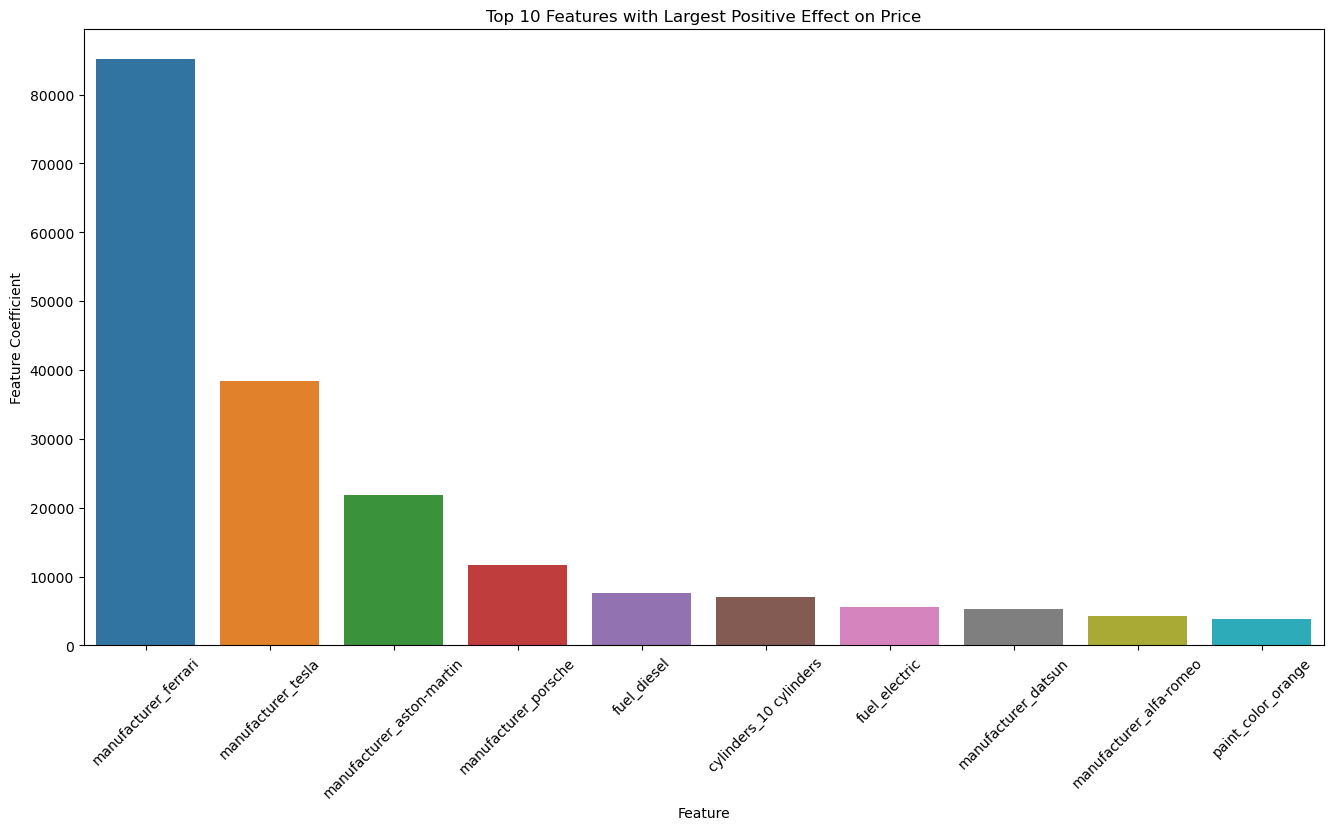

In [55]:
plt.figure(figsize = [16, 8])
plt.xticks(rotation=45)
plt.title("Top 10 Features with Largest Positive Effect on Price")
fig = sns.barplot(feats_positive.reset_index()[:10], x = 'feature', y = 'avg coef')
plt.xlabel('Feature')
plt.ylabel('Feature Coefficient')
plt.savefig('images/top10pos.png')


In [56]:
feats_negative = merge_coef_df[merge_coef_df['avg coef'] <= 0].sort_values('avg coef', ascending = True)
feats_negative[['avg coef']]

,avg coef
feature,
manufacturer_fiat,-6898.351710
manufacturer_saturn,-6641.446717
manufacturer_mercury,-6009.455152
manufacturer_chrysler,-5716.569015
manufacturer_subaru,-5343.478549
manufacturer_mini,-5300.178882
manufacturer_nissan,-5189.613861
manufacturer_kia,-5027.633525
manufacturer_mazda,-4570.548690


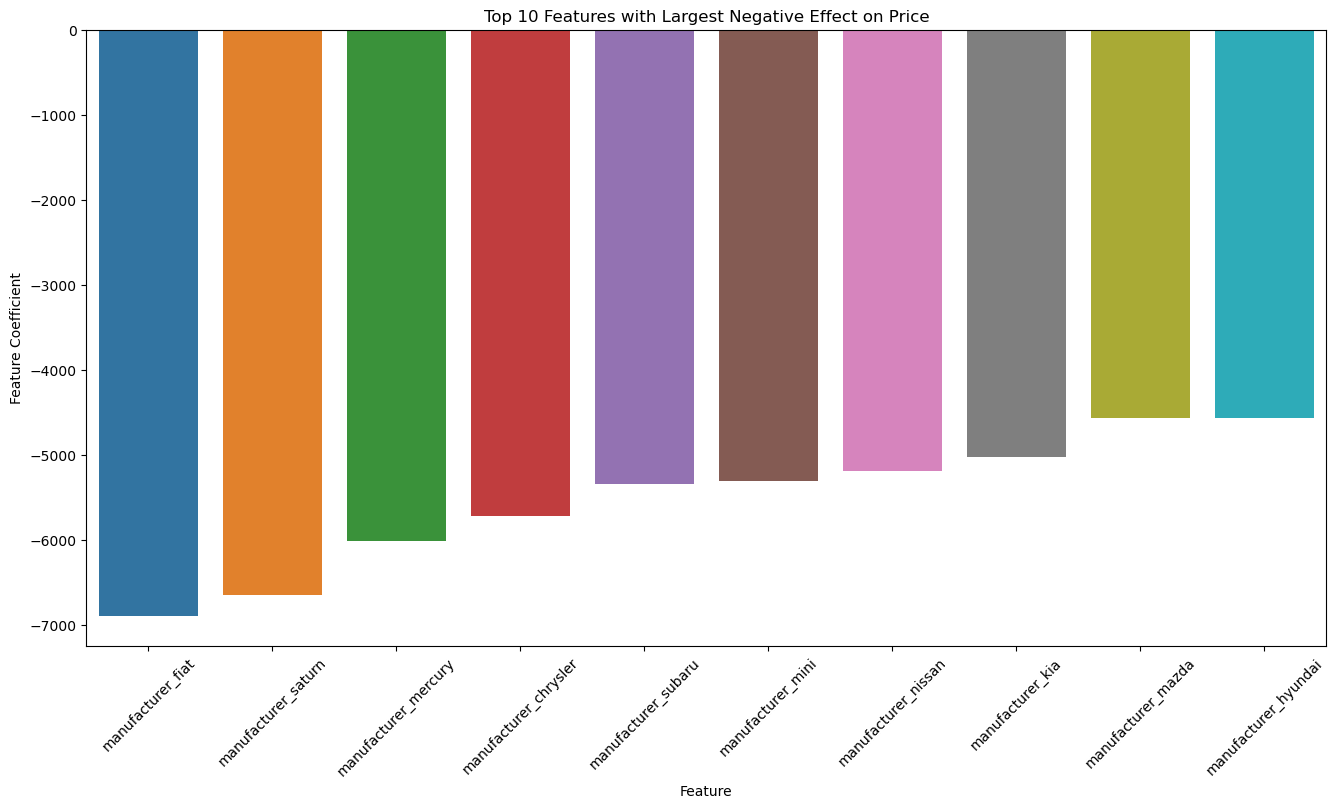

In [57]:
plt.figure(figsize = [16, 8])
plt.xticks(rotation=45)
plt.title("Top 10 Features with Largest Negative Effect on Price")
fig = sns.barplot(feats_negative.reset_index()[:10], x = 'feature', y = 'avg coef')
plt.xlabel('Feature')
plt.ylabel('Feature Coefficient')
plt.savefig('images/top10neg.png')

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

### Summary of Methods
Multiple linear regression-derived models were developed to determine the relative impact of each used car feature (the feature coefficient) on the price. The following models were developed:
- Basic linear regression
- Sequential feature selection with linear regression
- Backward feature selection with linear regression
- Ridge regression
- Lasso regression

#### Key Assumptions and Decisions
- A local used car dealership doesn't care about region/state as they can't change their location
- The model of the car was removed as it contained too many variables and would bog down or over-complicate the model

### Key Findings
The linear regression model performed the best, as determined by cross-validation. The Ridge and Lasso models performed comparable, so these models were aggregated to determine the average coefficient for each feature across the three models. Examining the coefficients for each feature, we can observe the following findings:

- #### The most important factor in determining the price of a used car is the manufacturer. This goes in both directions - positive and negative.
    - The manufacturers with the largest positive impact on price were Ferrari, Tesla, Aston-Martin, Porsche, Datsun, and Alfo-Romero. The first four had the most outsized effect.
     - The manufacturers with the largest negative impact on price were Fiat, Saturn, Mercury, Chrysler, Subaru, Mini, Nissan, Kia, Mazda, Hyundai
- #### Diesel and electric fuel types had a large positive impact on price
    - Gas and hybrid vehicles had moderate negative impacts on price
- #### The number of cylinders had a moderately large impact on price
    - 8 and above cyliners had a large impact on price, while anything less than 8 had relatively moderate negative impacts
- #### The condition of the car and the model year both had moderately large positive effects on price, as expected. However, the impact of the car condition was greater than the impact of model year.
- #### The type of car had a moderate impact on price in both directions
    - Convertibles, coupes, trucks, offroad, and vans had positive impacts whereas sedans, wagons, SUVs, hatchbacks and minivans had negative impacts. Pickups had negligible impact.
- #### The size of vehicles had a small impact on price. Full-size and mid-size vehicles had small positive impact, while compacts and sub-compacts had small negative impact
- #### Paint color had a mostly small impact in both directions, with the exception of the color orange, which had a moderately large positive impact on price

### Recommendations
If the goal of the dealership is to maximize selling prices and increase revenue, we recommend focusing on the following features when selecting inventory:
- High-end manufacturing brands, specifically Ferrari, Tesla, Aston-Martin, and Porsche.
- Specialized fuel types - specifically diesel and electric - over gas and hybrid
- Prioritize higher cylinder counts
- Better condition cars and newer model years - favor condition over year
- Prioritize convertible, coupes, trucks, and offroad vehicles over sedans, wagons, SUVs, and hatchbacks.
- Orange and yellow cars. Avoid brown cars